# Convolution Nets for MNIST

In [1]:
#Import the required libraries
import numpy as np
import tensorflow as tf

################Note that we are using tf.keras, not keras!#####################################
import tensorflow.keras as keras

from keras.datasets import mnist

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [5]:
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

## Loading Data

In [6]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

## Data Preparation

In [8]:
from tensorflow.keras import backend as K

In [9]:
# Doing some prep for image data example here

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)
    
print(shape_ord)  # Height, Width, and Depth of input image data

(28, 28, 1)


#### Preprocess and Normalise Data

In [10]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32') # set numeric type
X_test = X_test.astype('float32')

print(np.amax(X_train)) # lets convert the pixel data to a proportion between zero and 1

X_train /= 255 # /= takes X_train and divides by 255
X_test /= 255  # /= takes X_test and divides by 255

255.0


In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # samples, N for obs. rows, N for obs. cols 
                                                                 # and nmbr of channels


(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [12]:
X_train.max()

1.0

In [13]:
# Converting the classes to its binary categorical form (i.e.-one hot encoding, so its in a structure keras accepts)
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Y_train.shape
Y_test.shape

(10000, 10)

# A simple CNN

In [14]:
# -- Initializing the values for the convolution neural network
# Setting up convolutional layer with 32 filters that are 3 by 3

nb_epoch = 5  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling (2 by 2)
nb_pool = 2
# convolution kernel/filter size (3 by 3)
nb_conv = 3 

# Vanilla SGD to speed up optimization for example 
sgd = SGD(learning_rate=0.1)

In [15]:
shape_ord

(28, 28, 1)

#### Step 1: Model Definition

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='valid', # could also add strides=2, default is 1
                 input_shape=(28,28,1))) # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax')) #could have set this up using sigmoid and included final Dense(1) layer rather than Dense(2)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 10)                216330    
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


#### Step 2: Compile

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#### Step 3: Fit

In [ ]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_split=.2)

Epoch 1/5
750/750 [==============================] - 14s 4ms/step - loss: 0.3776 - accuracy: 0.8881 - val_loss: 0.2099 - val_accuracy: 0.9421
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1584 - accuracy: 0.9555 - val_loss: 0.1163 - val_accuracy: 0.9694
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0994 - accuracy: 0.9719 - val_loss: 0.0943 - val_accuracy: 0.9749
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 0.0898 - val_accuracy: 0.9758
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0634 - accuracy: 0.9812 - val_loss: 0.0774 - val_accuracy: 0.9774


### Let's plot our model Predictions!

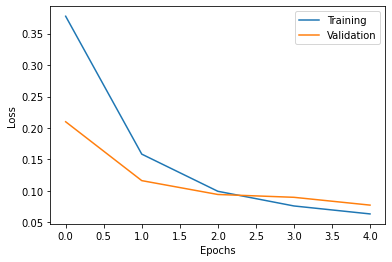

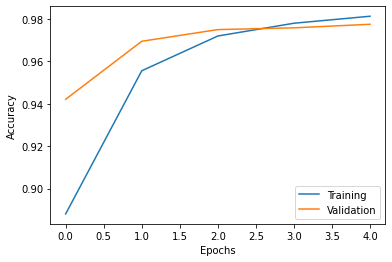

In [ ]:
#plot loss and accuracy at each epoch
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

### Step 4: Evaluate

In [ ]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'accuracy']


In [ ]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.06986350566148758
Test Accuracy: 0.9782000184059143


# Adding more Dense Layers

In [ ]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4935 - accuracy: 0.8705 - val_loss: 0.2550 - val_accuracy: 0.9265
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2409 - accuracy: 0.9305 - val_loss: 0.2053 - val_accuracy: 0.9412
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1866 - accuracy: 0.9466 - val_loss: 0.1951 - val_accuracy: 0.9434
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1533 - accuracy: 0.9557 - val_loss: 0.1406 - val_accuracy: 0.9595
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1298 - accuracy: 0.9626 - val_loss: 0.1267 - val_accuracy: 0.9621


In [ ]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.12665961682796478
Test accuracy: 0.9621000289916992


# Adding more Convolution Layers and Max Pooling

---



In [ ]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
  
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.8079 - accuracy: 0.7655 - val_loss: 0.2627 - val_accuracy: 0.9230
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2088 - accuracy: 0.9383 - val_loss: 0.1456 - val_accuracy: 0.9586
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1454 - accuracy: 0.9568 - val_loss: 0.1270 - val_accuracy: 0.9600
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1156 - accuracy: 0.9651 - val_loss: 0.1001 - val_accuracy: 0.9694
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0989 - accuracy: 0.9701 - val_loss: 0.0962 - val_accuracy: 0.9712


In [ ]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.09620118141174316
Test accuracy: 0.9711999893188477


# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [ ]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [ ]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model() # time a single loop of the model in the function. 

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.6130 - accuracy: 0.8151 - val_loss: 0.2723 - val_accuracy: 0.9211
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2077 - accuracy: 0.9382 - val_loss: 0.1841 - val_accuracy: 0.9450
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1541 - accuracy: 0.9539 - val_loss: 0.1451 - val_accuracy: 0.9555
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1259 - accuracy: 0.9619 - val_loss: 0.1219 - val_accuracy: 0.9639
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1079 - accuracy: 0.9672 - val_loss: 0.1265 - val_accuracy: 0.9576
Test score: 0.12647204101085663
Test accuracy: 0.9575999975204468
1 loop, best of 1: 19.3 s per loop


In [ ]:
model.save("hand_written_digits_keras.h5") # save model to single HDF5 file

In [ ]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
modelload = load_model("hand_written_digits_keras.h5")

In [ ]:
from skimage import io
from skimage.transform import rescale,resize
import numpy
from skimage.color import rgb2gray
image_file_type="jpg"

img = io.imread("img_2.jpg")

fixed_size=(32,32)
#img=reshape(img,-1)
resized_image=resize(img, fixed_size) #reshaping image

resized_image.shape


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


fixed_size=(28,28)

def load_image(img_path, fixed_size,show=False):
    img = image.load_img(img_path, target_size=fixed_size,color_mode='grayscale')
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)
             # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor = (img_tensor-img_tensor.min())/(img_tensor.max()-img_tensor.min())     # models expect values between 0,1                          
    return img_tensor


# load model
modelload = load_model("hand_written_digits_keras.h5")

# image path
img_path = 'img_2.jpg'    

# load a single image
new_image = load_image(img_path, fixed_size)

# check prediction
modelload.predict_classes(new_image)

array([0])

In [ ]:
# What would color image preprocessing look like?

# Import image, load to array of shape height, width, channels, then min/max transform.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img

# read in all images from filenames

preprocessed_image_data=list(map(load_image, listoffilepaths)) 

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

---